# Box office revenue prediction and movie data visualization

A movie's success is largely based on its box office revenue and profit. In this project, we are going to build a machine learning model to predict the profit of a movie given such features as budget, movie length and IMDB rating.

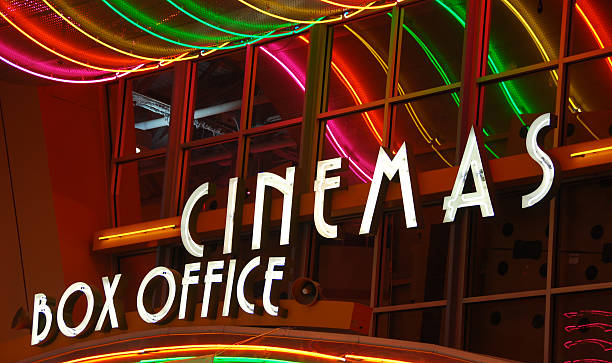

First, let's import the necesssary libraries and load our dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()

In [2]:
# loading the dataset
df = pd.read_csv('Blockbusters_2019-1977.csv')
df.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi


Our dataset has been retrieved from Kaggle and provides information on the top ten highest grossing films worldwide between the years 2019 and 1977. The data in the database also contains the following attributes:

* release_year
* rankinyear
* imdb_rating
* mpaa_rating
* film_title
* film_budget
* lengthinmin
* domestic_distributor
* worldwide_gross
* domestic_gross
* genre_1
* genre_2
* genre_3

Now, let's check the general information about our dataset:

In [3]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating           429 non-null    object 
 4   film_title            430 non-null    object 
 5   film_budget           430 non-null    object 
 6   length_in_min         430 non-null    int64  
 7   domestic_distributor  430 non-null    object 
 8   worldwide_gross       430 non-null    object 
 9   domestic_gross        430 non-null    object 
 10  genre_1               430 non-null    object 
 11  genre_2               409 non-null    object 
 12  genre_3               324 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 43.8+ KB


From this we can observe that both data types for 'film_budget' and 'worldwide_gross' are objects, but we need them to be integers in order to proceed with our analyses. So let's transform those data types to numeric and remove the comes between the numbers.

In [4]:
# transforming object to numeric and removing commas
df['film_budget'] = pd.to_numeric(df['film_budget'].str.replace(',', ''))
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].str.replace(',', ''))

df.dtypes

release_year              int64
rank_in_year              int64
imdb_rating             float64
mpaa_rating              object
film_title               object
film_budget               int64
length_in_min             int64
domestic_distributor     object
worldwide_gross           int64
domestic_gross           object
genre_1                  object
genre_2                  object
genre_3                  object
dtype: object

## 1. Adjusting for inflation 

In order to be able to compare movies' budgets and revenues, and to calculate their profit, we are first going to correct all those values for inflation. To do this, we're first going to import CPI, which stands for Consumer Price Index and tracks changes in prices over time.

In [5]:
# importing cpi
import cpi

Let's also transform release_year to datetime before calculating the values corrected for inflation.

In [6]:
# transforming release_year to datetime
df['new_year'] = pd.to_datetime(df['release_year'], format = '%Y')

In [7]:
df.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,new_year
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,"858,373,000",Action,Adventure,Drama,2019-01-01
1,2019,2,7.0,PG,The Lion King,260000000,118,Walt Disney,1656943394,"543,638,043",Animation,Adventure,Drama,2019-01-01
2,2019,3,7.2,PG,Frozen II,150000000,103,Walt Disney,1420560456,"470,089,732",Animation,Adventure,Comedy,2019-01-01
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000,129,Sony Pictures,1131927996,"390,532,085",Action,Adventure,Sci-Fi,2019-01-01
4,2019,5,6.9,PG-13,Captain Marvel,175000000,123,Walt Disney,1128274794,"426,829,839",Action,Adventure,Sci-Fi,2019-01-01


Now, we're going to adjust both worldwide_gross and film_budget for inflation:

In [8]:
# adjusting worlwide_gross and film_budget for inflation
df["worldwide_adjusted"] = df.apply(lambda x: cpi.inflate(x["worldwide_gross"], x["new_year"]), axis=1)
df["budget_adjusted"] = df.apply(lambda x: cpi.inflate(x["film_budget"], x["new_year"]), axis=1)

In [9]:
# checking dataframe
df.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,new_year,worldwide_adjusted,budget_adjusted
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,"858,373,000",Action,Adventure,Drama,2019-01-01,3.040721e+09,3.869098e+08
1,2019,2,7.0,PG,The Lion King,260000000,118,Walt Disney,1656943394,"543,638,043",Animation,Adventure,Drama,2019-01-01,1.800808e+09,2.825746e+08
2,2019,3,7.2,PG,Frozen II,150000000,103,Walt Disney,1420560456,"470,089,732",Animation,Adventure,Comedy,2019-01-01,1.543901e+09,1.630238e+08
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000,129,Sony Pictures,1131927996,"390,532,085",Action,Adventure,Sci-Fi,2019-01-01,1.230208e+09,1.738921e+08
4,2019,5,6.9,PG-13,Captain Marvel,175000000,123,Walt Disney,1128274794,"426,829,839",Action,Adventure,Sci-Fi,2019-01-01,1.226238e+09,1.901944e+08


## 2. Calculating the profit

With both both worldwide_gross and film_budget adjusted for inflation, we can calculate the movies' profit by subtracting the budget from the worldwide revenue.

In [10]:
# calculating the profit = worldwide_adjusted - budget_adjusted
df['profit'] = df['worldwide_adjusted'] - df['budget_adjusted']

In [11]:
# cheking the dataframe
df.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,new_year,worldwide_adjusted,budget_adjusted,profit
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,"858,373,000",Action,Adventure,Drama,2019-01-01,3.040721e+09,3.869098e+08,2.653811e+09
1,2019,2,7.0,PG,The Lion King,260000000,118,Walt Disney,1656943394,"543,638,043",Animation,Adventure,Drama,2019-01-01,1.800808e+09,2.825746e+08,1.518234e+09
2,2019,3,7.2,PG,Frozen II,150000000,103,Walt Disney,1420560456,"470,089,732",Animation,Adventure,Comedy,2019-01-01,1.543901e+09,1.630238e+08,1.380877e+09
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000,129,Sony Pictures,1131927996,"390,532,085",Action,Adventure,Sci-Fi,2019-01-01,1.230208e+09,1.738921e+08,1.056316e+09
4,2019,5,6.9,PG-13,Captain Marvel,175000000,123,Walt Disney,1128274794,"426,829,839",Action,Adventure,Sci-Fi,2019-01-01,1.226238e+09,1.901944e+08,1.036043e+09


And since we'll be doing most of our visualizations using Tableau, let's export the cleaned data with the profit as a csv file.

In [12]:
# exporting the cleaned data for further visualization
df.to_csv('cleaned_df.csv',index = False)

## 3. Top 5 movies at the global box office

With the cleaned data, we can see which movies have earned the highest worlwide revenue:

In [13]:
# sorting the data by the worldwide gross in descending order 
top_10_worldwide_gross = df.sort_values(by = ['worldwide_adjusted'], ascending = False) 

# displaying the top 5 movies 
top_10_worldwide_gross.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,new_year,worldwide_adjusted,budget_adjusted,profit
100,2009,1,7.8,PG-13,Avatar,237000000,162,Twentieth Century Fox,2744336793,"749,766,139",Action,Adventure,Fantasy,2009-01-01,3.555694e+09,3.070686e+08,3.248626e+09
220,1997,1,7.8,PG-13,Titanic,200000000,194,Paramount Pictures,1850197130,"600,788,188",Drama,Romance,NaN,1997-01-01,3.181351e+09,3.438931e+08,2.837457e+09
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,"858,373,000",Action,Adventure,Drama,2019-01-01,3.040721e+09,3.869098e+08,2.653811e+09
40,2015,1,7.9,PG-13,Star Wars: Episode VII - The Force Awakens,245000000,138,Walt Disney,2068223624,"936,662,225",Action,Adventure,Sci-Fi,2015-01-01,2.420970e+09,2.867861e+08,2.134184e+09
420,1977,1,8.6,PG,Star Wars: Episode IV - A New Hope,11000000,121,Twentieth Century Fox,503015849,"307,263,857",Action,Adventure,Fantasy,1977-01-01,2.352283e+09,5.143995e+07,2.300843e+09


## 4. Top 5 movies with the highest budget

We can also check which movies had the highest budget:

In [14]:
# sorting the data by the biggest budget in descending order 
top_10_budget = df.sort_values(by = ['budget_adjusted'], ascending = False) 

# displaying the top 5 movies 
top_10_budget.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,new_year,worldwide_adjusted,budget_adjusted,profit
120,2007,1,7.1,PG-13,Pirates of the Caribbean: At World's End,300000000,169,Walt Disney,960996492,"309,420,425",Action,Adventure,Fantasy,2007-01-01,1.298795e+09,4.054526e+08,8.933426e+08
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,"858,373,000",Action,Adventure,Drama,2019-01-01,3.040721e+09,3.869098e+08,2.653811e+09
138,2006,9,6.0,PG-13,Superman Returns,270000000,154,Warner Bros.,391081192,"200,081,192",Action,Sci-Fi,NaN,2006-01-01,5.395205e+08,3.724815e+08,1.670389e+08
20,2017,1,7.0,PG-13,Star Wars: Episode VIII - The Last Jedi,317000000,152,Walt Disney,1332539889,"620,181,382",Action,Adventure,Fantasy,2017-01-01,1.501155e+09,3.571121e+08,1.144043e+09
10,2018,1,8.5,PG-13,Avengers: Infinity War,321000000,149,Walt Disney,2048359754,"678,815,482",Action,Adventure,Sci-Fi,2018-01-01,2.260743e+09,3.542828e+08,1.906460e+09


## 5. Top 5 most profitable movies

And the movies who made the largest profit:

In [15]:
# sorting the data by the profit in descending order 
top_10_profit = df.sort_values(by = ['profit'], ascending = False) 

# displaying the top 5 movies 
top_10_profit.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,new_year,worldwide_adjusted,budget_adjusted,profit
100,2009,1,7.8,PG-13,Avatar,237000000,162,Twentieth Century Fox,2744336793,"749,766,139",Action,Adventure,Fantasy,2009-01-01,3.555694e+09,3.070686e+08,3.248626e+09
220,1997,1,7.8,PG-13,Titanic,200000000,194,Paramount Pictures,1850197130,"600,788,188",Drama,Romance,NaN,1997-01-01,3.181351e+09,3.438931e+08,2.837457e+09
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,"858,373,000",Action,Adventure,Drama,2019-01-01,3.040721e+09,3.869098e+08,2.653811e+09
420,1977,1,8.6,PG,Star Wars: Episode IV - A New Hope,11000000,121,Twentieth Century Fox,503015849,"307,263,857",Action,Adventure,Fantasy,1977-01-01,2.352283e+09,5.143995e+07,2.300843e+09
40,2015,1,7.9,PG-13,Star Wars: Episode VII - The Force Awakens,245000000,138,Walt Disney,2068223624,"936,662,225",Action,Adventure,Sci-Fi,2015-01-01,2.420970e+09,2.867861e+08,2.134184e+09


## 6. Worldwide box office studio ranking

We can also calculate the profit from all movies from a specific studio since 1977 and check which studio earned more money since then:

In [16]:
# checking which studio made more money
df.groupby(['domestic_distributor'])['profit'].agg('sum').sort_values(ascending = False)

domestic_distributor
Walt Disney                        6.310539e+10
Warner Bros.                       4.197320e+10
Universal Pictures                 3.429374e+10
Twentieth Century Fox              3.317661e+10
Paramount Pictures                 3.071736e+10
Sony Pictures                      1.954202e+10
DreamWorks                         1.130903e+10
New Line Cinema                    6.563662e+09
Columbia Pictures                  5.810930e+09
Metro-Goldwyn-Mayer                4.705197e+09
TriStar Pictures                   4.629680e+09
Lionsgate                          3.794273e+09
Orion Pictures                     2.423502e+09
Summit Entertainment               2.398975e+09
United Artists                     2.061871e+09
The H Collective                   9.465446e+08
Icon Productions                   8.589394e+08
IFC Films                          5.618767e+08
Vestron Pictures                   5.103461e+08
Rank Film Distributors             4.515181e+08
Miramax            

## 7. Most profitable genres

We can also check which genre is the most profitable:

In [17]:
# checking which genre made more money
df.groupby(['genre_1'])['profit'].agg('sum').sort_values(ascending = False)

genre_1
Action       1.336484e+11
Animation    4.130874e+10
Adventure    3.279724e+10
Comedy       2.761749e+10
Drama        2.149718e+10
Crime        4.487023e+09
Family       3.267940e+09
Biography    2.980322e+09
Musical      1.576529e+09
Horror       1.570943e+09
Mystery      4.279653e+08
Sci-Fi       1.890009e+08
Name: profit, dtype: float64

## 8. Top words from movie titles

And which words appear more often on the movie titles. For this, we'll the wordcount library. Word cloud is a data visualization technique used for the representation of text data in which the size of each word indicates its frequency or importance.

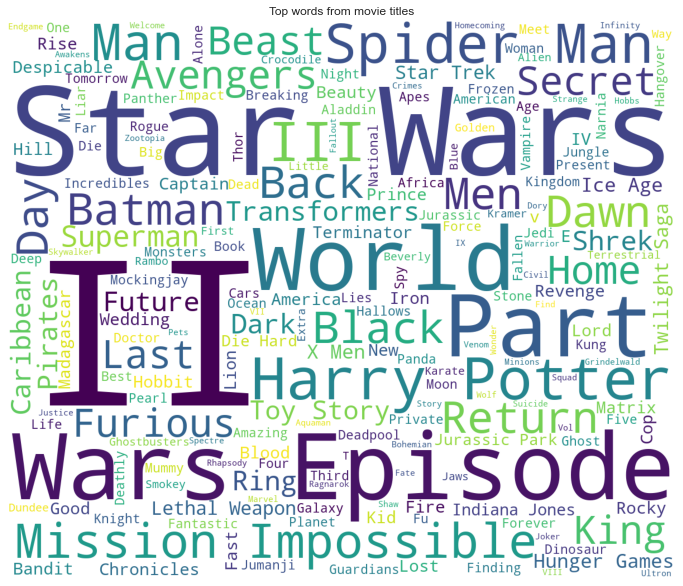

In [18]:
# starting the figure
plt.figure(figsize = (12, 12))

# to extract the text
token_title = ' '.join(df['film_title'].values)

# creating the figure with a white background
wordcloud = WordCloud(max_font_size = None, background_color = 'white', width = 1200, height = 1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles')
plt.axis("off")
plt.show()

We can see that the most popular word are II, World, Wars, Episode, Star, Harry and Potter; as the most frequent words are larger in size.

## 9. Correlation between predictor variables

Now that we have concluded our exploratory data analysis on our movie dataset, we will start to think about our machine learning model. First, we will calculate the correlation between our variables and plot them in a heatmap:

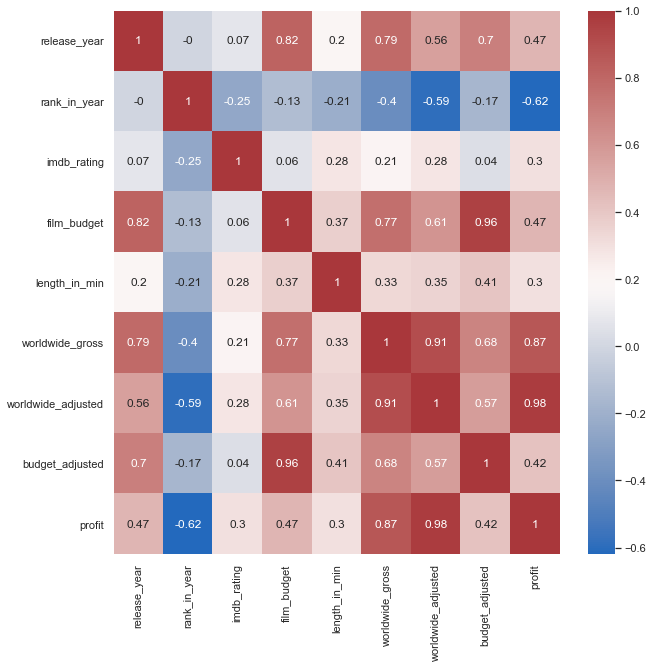

In [19]:
# calculate the correlation between variables and plotting it as a heatmap
corr = df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap = 'vlag');

With this we can see that a movie's profit is correlated with its budget (0.42). Showing that a movie's budget can be a good indicator if the movie is going to perform well worldwide.

## 10. Multiple linear regression model

In order to predict a movie's profit, we will use multiple linear regression (MLR), also known simply as multiple regression, which is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. First let's import our libraries:

In [20]:
# importing the libraries
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

Then we'll create a list with the features "film budget", "length of the movie" and "imdb rating" and check which feature is the most important in our regression model:

In [21]:
# creating a list of our features
feature_universe = ['film_budget', 'length_in_min', 'imdb_rating']

# to predict the profit
feats = feature_selection.mutual_info_regression(df[feature_universe], df['profit'])

# creating a dataframe of the features and their importance
feat_importance_df = pd.DataFrame(list(zip(feature_universe,feats)), columns=['feature','importance'])

# sorting our features by their importance
feat_importance_df.sort_values(by = 'importance', ascending = False, inplace = True)

In [22]:
# showing the top features
top_feats = [x for x in feat_importance_df['feature'][0:3]]
top_feats

['film_budget', 'length_in_min', 'imdb_rating']

<BarContainer object of 3 artists>

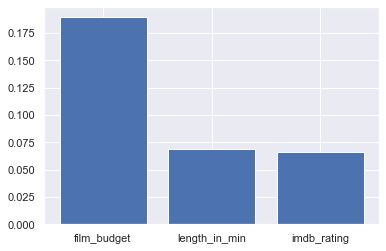

In [23]:
# making a bar plot of the most important features for our model
plt.bar(feat_importance_df['feature'], feat_importance_df['importance'])

With this, we can observe that 'film_budget' is the most important feature to predict a movie's profit in our model.

We'll now split our dataset into train and test, assign our model to a linear regression, fit the model and get its score:

In [24]:
# splitting the data so the train set contains 70% of the data points
split = 0.30
X_trn, X_tst, Y_trn, Y_tst = train_test_split(df[top_feats], df['worldwide_gross'], test_size = split, random_state = 42)

# assigning the model = linear regression
reg = linear_model.LinearRegression()

# fitting the model
regfit = reg.fit(X_trn, Y_trn)

# getting the score
regfit.score(X_tst, Y_tst)

0.7024199108177654

With this, we can see that our model has a score of 0.70. 

## 12. Conclusions

From our analyses we can conclude that:
* Action is the most profitable genre
* The most profitable movie since 1977 was Avatar
* The studio that earned the most amount of money since 1977 was Walt Disney
* When creating a machine learning model to predict a movie's profit, the most important feature is its budget